In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv('vfnd-vietnamese-fake-news-datasets-master/CSV/vn_news_223_tdlfr.csv')

df.head()

,text,domain,label
0,Thủ tướng Abe cúi đầu xin lỗi vì hành động phi...,binhluan.biz,1
1,Thủ tướng Nhật cúi đầu xin lỗi vì tinh thần ph...,www.ipick.vn,1
2,Choáng! Cơ trưởng đeo khăn quàng quẩy banh nóc...,tintucqpvn.net,1
3,Chưa bao giờ nhạc Kpop lại dễ hát đến thế!!!\n...,tintucqpvn.net,1
4,"Đại học Hutech sẽ áp dụng cải cách ""Tiếq Việt""...",www.gioitreviet.net,1


In [3]:
for i in range(len(df['domain'])):
    df.at[i, 'domain'] = re.sub(r'www.|/|https:|http:', '', df['domain'][i])

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    223 non-null    object
 1   domain  223 non-null    object
 2   label   223 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.4+ KB
None


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd

# plotly packages
import plotly
#import iplot
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

In [11]:
from underthesea import word_tokenize
#Tokenize, put all words in an array(can be modified for preprocessing)
T=[]
F=[]
for i in range(len(df['text'])):
    if(df['label'][i]):
        T.extend(re.findall(r'[_\w]+', word_tokenize(df['text'][i], format='text')))
    else:
        F.extend(re.findall(r'[_\w]+', word_tokenize(df['text'][i], format='text')))
#     df['text'][i]=word_tokenize(df['text'][i])

In [23]:
print(T[:50])

['Thủ_tướng', 'Abe', 'cúi', 'đầu', 'xin_lỗi', 'vì', 'hành_động', 'phi', 'thể_thao', 'của', 'tuyển', 'Nhật', 'Theo', 'Sankei_Sports', 'sáng', 'nay', 'Thủ_tướng', 'Nhật_Bản_Shinzo_Abe', 'công_khai', 'gửi', 'lời', 'xin_lỗi', 'tới', 'Nhật_hoàng', 'và', 'toàn_bộ', 'người', 'dân', 'vì', 'tinh_thần', 'thi_đấu', 'phi', 'thể_thao', 'của', 'đội_tuyển', 'Nhật', 'tại', 'World_Cup', '2018', 'Tối_qua', 'sau', 'lượt', 'trận', 'cuối', 'vòng', 'bảng', 'World_Cup', '2018', 'Nhật_Bản', 'có']


In [16]:
#Stopword
stop_words=[]
with open('vietnamese-stopwords-dash.txt', encoding="utf8") as f:
    for s in f:
        s= s.split('\n')
        stop_words.append(s[0])

In [24]:
print(stop_words[:50])

['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy', 'ai_đó', 'alô', 'amen', 'anh', 'anh_ấy', 'ba', 'ba_ba', 'ba_bản', 'ba_cùng', 'ba_họ', 'ba_ngày', 'ba_ngôi', 'ba_tăng', 'bao_giờ', 'bao_lâu', 'bao_nhiêu', 'bao_nả', 'bay_biến', 'biết', 'biết_bao', 'biết_bao_nhiêu', 'biết_chắc', 'biết_chừng_nào', 'biết_mình', 'biết_mấy', 'biết_thế', 'biết_trước', 'biết_việc', 'biết_đâu', 'biết_đâu_chừng', 'biết_đâu_đấy', 'biết_được', 'buổi', 'buổi_làm', 'buổi_mới', 'buổi_ngày', 'buổi_sớm', 'bà', 'bà_ấy', 'bài', 'bài_bác', 'bài_bỏ', 'bài_cái', 'bác', 'bán']


In [14]:
from wordcloud import WordCloud, ImageColorGenerator

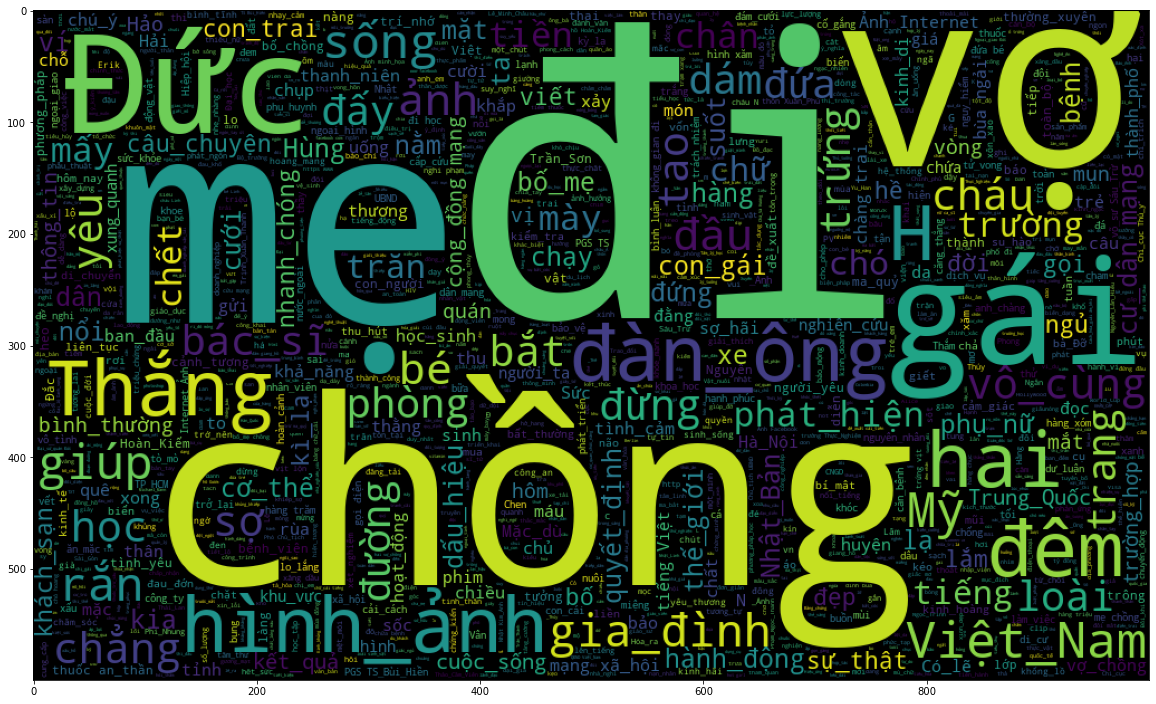

In [20]:
# True news
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width = 1000, height = 600, stopwords = stop_words).generate(" ".join(T))
plt.imshow(wc)

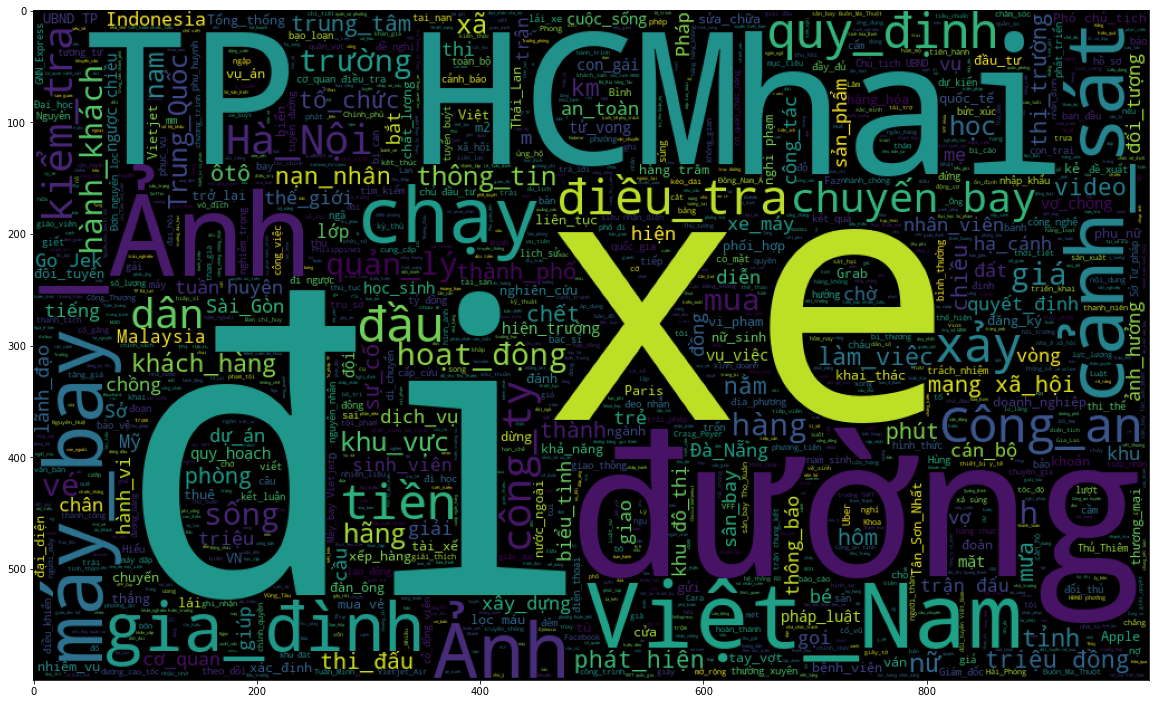

In [21]:
#Fake news
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width = 1000, height = 600, stopwords = stop_words).generate(" ".join(F))
plt.imshow(wc)